<h1> Imports and Reading Data </h1>

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use("ggplot")

In [3]:
df = pd.read_csv('Documents/Student Performance Analysis/StudentsPerformance.csv')

<h1> Data Understanding </h1>

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

<p> Our dataset has 1000 rows and 8 Columns </p>

In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

<p> Most of our data types are strings except the reading, the writing, and the math score </p>

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<h1> Data Preparation </h1>

In [9]:
#Let's change the way the columns are written
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [10]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.loc[df.duplicated()] #No duplicates...

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


In [12]:
#Let's check for null values...
df.isnull().sum()
#No null values, great! let's keep moving...

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [13]:
#Let's check for na values...
df.isna().sum()
#No NaN values , great! I think our dataset is pretty clean...

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

<h2> Feature Creation </h2>

<p> Let's add a grade column to our dataset representing the grade of a student using the following scale </p>
<ul>
    <li> A - 90%-100% -  PASS </li>
    <li> B - 80% - 89% - PASS </li>
    <li> C - 70% - 79% - PASS </li>
    <li> D - 60% - 69% - PASS </li>
    <li> F - 0%  - 59% - FAIL </li>
</ul>

<h2> Let's add a new column call overall score </h2>

In [14]:
df['overall_score'] = np.round((df['math_score'] + df['reading_score'] + df['writing_score']) / 3)

In [15]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [16]:
df['grade'] = 'A'

In [17]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,A
1,female,group C,some college,standard,completed,69,90,88,82.0,A
2,female,group B,master's degree,standard,none,90,95,93,93.0,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0,A
4,male,group C,some college,standard,none,76,78,75,76.0,A


In [18]:
overcall_score_list = list(df['overall_score'])

In [19]:
df['grade'] = ''

In [20]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,
1,female,group C,some college,standard,completed,69,90,88,82.0,
2,female,group B,master's degree,standard,none,90,95,93,93.0,
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0,
4,male,group C,some college,standard,none,76,78,75,76.0,


In [21]:
grade_list = list(df['grade'])

In [22]:
for i in range(0, len(overcall_score_list)):
    if overcall_score_list[i] >= 90:
        grade_list[i] = 'A'
    elif 80 <= overcall_score_list[i] <= 89:
        grade_list[i] = 'B'
    elif 70 <= overcall_score_list[i] <= 79:
        grade_list[i] = 'C'
    elif 60 <= overcall_score_list[i] <= 69:
        grade_list[i] = 'D'
    elif 0  <= overcall_score_list[i] <= 59:
        grade_list[i] = 'F'

In [23]:
df['grade']  = grade_list

In [24]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,C
1,female,group C,some college,standard,completed,69,90,88,82.0,B
2,female,group B,master's degree,standard,none,90,95,93,93.0,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0,F
4,male,group C,some college,standard,none,76,78,75,76.0,C


In [25]:
print("Hello World")

Hello World


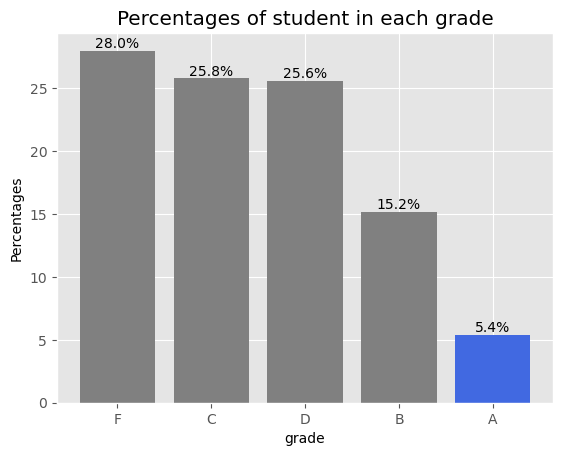

In [26]:
count = df['grade'].value_counts()
percentages = (count / count.sum())*100

for i, v in enumerate(percentages):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')


colors = ['gray'] * len(percentages)
highlight_bar_index = 4
colors[highlight_bar_index] = 'royalblue'
plt.bar(percentages.index, percentages, color = colors)
plt.title('Percentages of student in each grade')
plt.xlabel('grade')
plt.ylabel('Percentages')
plt.show()

<h4> So we have about 54 Grade A students (5%), The best students in the class </h4>

<h1> Gender Analysis </h1>

<p> More female students passed their exams
than male students, and on average, female
students scored higher than male students.</p>

<p>Female students perform better in readings
and writings, while male students perform
better in maths.</p>

<p>Two-thirds of the exam content is in
readings and writings, and female students
excel in these subjects.</p>

In [27]:
df['result'] = ''
result_list = list(df['result'])
for i in range(0,len(grade_list)):
    if grade_list[i] == 'A':
        result_list[i] = 'PASS'
    elif grade_list[i] == 'B':
        result_list[i] = 'PASS'
    elif grade_list[i] == 'C':
        result_list[i] = 'PASS'
    elif grade_list[i] == 'D':
        result_list[i] = 'PASS'
    else: 
        result_list[i] = 'FAIl'

In [28]:
df['result'] = result_list

In [29]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_score,grade,result
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,C,PASS
1,female,group C,some college,standard,completed,69,90,88,82.0,B,PASS
2,female,group B,master's degree,standard,none,90,95,93,93.0,A,PASS
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0,F,FAIl
4,male,group C,some college,standard,none,76,78,75,76.0,C,PASS


Text(0.17, 420, 'More female students pass their exams')

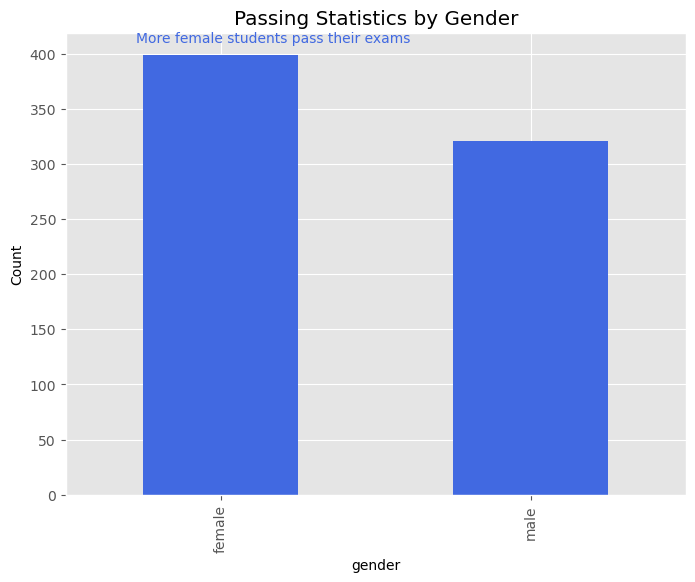

In [30]:
df_pass = df[df['result'] == 'PASS']

grouped = df_pass.groupby(['gender']).size()
grouped.plot(kind='bar', stacked=False, color = 'royalblue')
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.ylabel('Count')
plt.title("Passing Statistics by Gender")
plt.text(0.17, 420, 'More female students pass their exams', fontsize=10, color='royalblue', ha='center', va='top')

In [31]:
df_pass.groupby(['gender'])["result"].value_counts()

gender  result
female  PASS      399
male    PASS      321
Name: result, dtype: int64

<p> Since more female are passing that male students, we can easily deduce that <b>more male students are failing than female students</b></p>

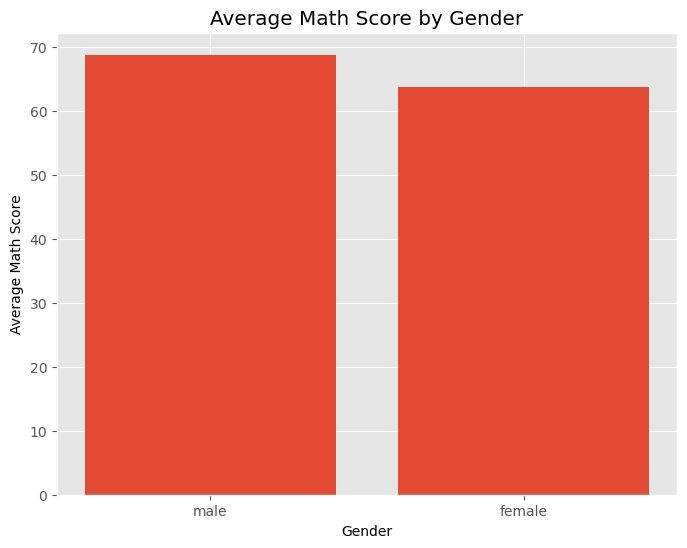

In [38]:
def subjectComparisonPlot(subject): 
    male_mean = df[df['gender'] == 'male'][subject].mean()
    female_mean = df[df['gender'] == 'female'][subject].mean()

    # Create the plot
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    plt.bar(['male', 'female'], [male_mean, female_mean])
    plt.xlabel('Gender')
    plt.ylabel('Average Math Score')
    plt.title('Average Math Score by Gender')

    # Display the plot
    plt.show()  

subjectComparisonPlot('math_score')

<p> We can see in the previous plot that Male students outperformed female students in Math </p>
<p> Now let's examine who is better in the remaining subject ( Reading and Writing) </p>

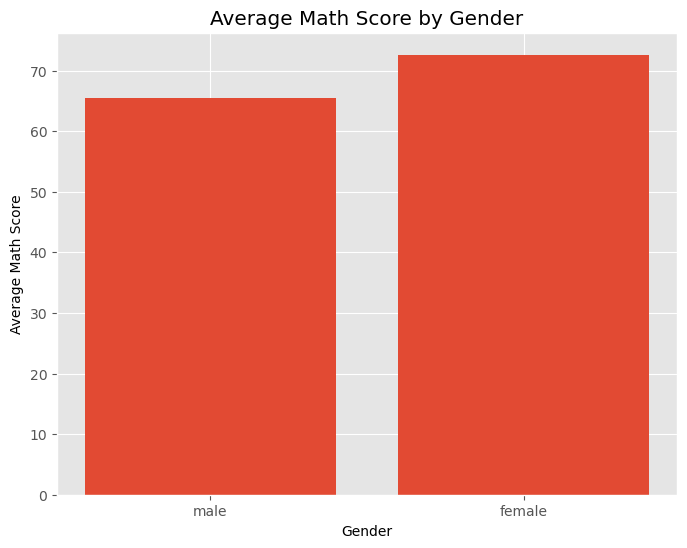

In [39]:
subjectComparisonPlot('reading_score')

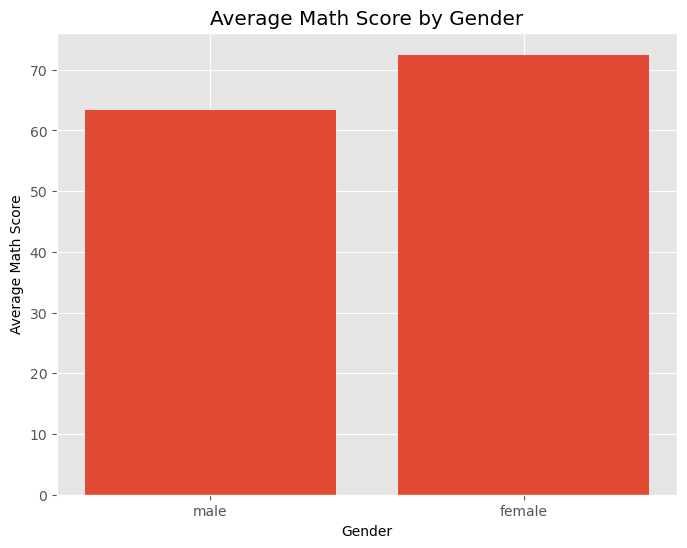

In [40]:
subjectComparisonPlot('writing_score')

<p> So we can see that while Male students outperformed female students in Math, Female students are better at writing and reading </p>

<h3> Let's examine some correlation between score in different subjects </h3>

0.9545980771462477

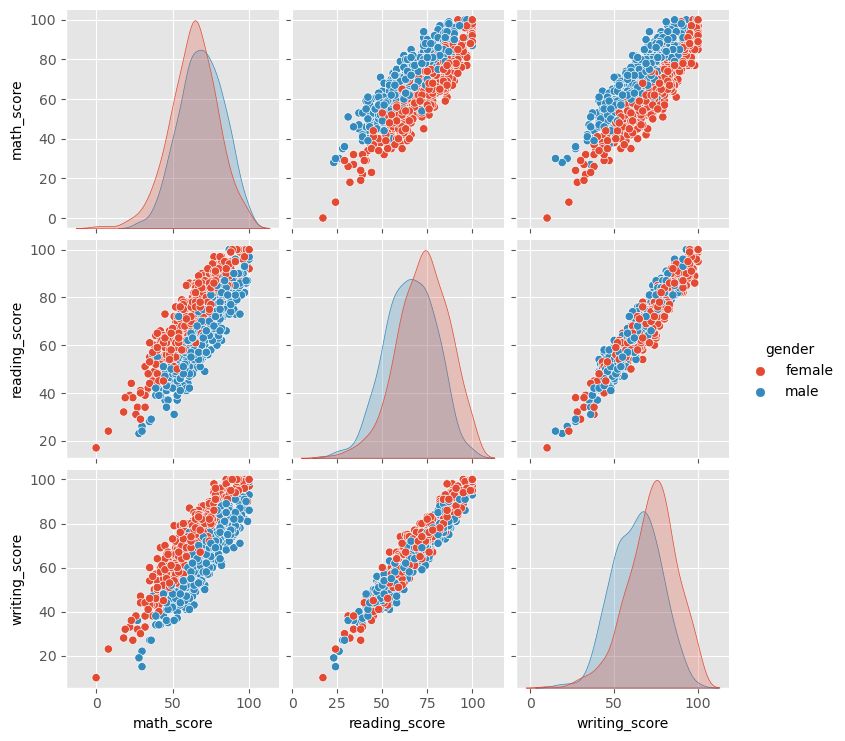

In [45]:
sns.pairplot(df, vars = ['math_score', 'reading_score', 'writing_score'], hue = 'gender')
rw_corr = df['writing_score'].corr(df['reading_score'])
rw_corr

<p> There is a strong correlation between score in reading and in writing 0.95, meaning being good at reading is associated with being good at writing and vice versa </p>

<h1> Short Summary Statistics </h1>

In [47]:
df_summary = df[['gender', 'math_score', 'reading_score', 'writing_score']]
np.round(df_summary.groupby('gender').mean(), 2)

,math_score,reading_score,writing_score
gender,,,
female,63.63,72.61,72.47
male,68.73,65.47,63.31


<p> This is just to emphasize the fact that male students are better at Math, while female students are better in writing and reading </p>

<h1>CONTROLLING FACTORS ANALYSIS</h1>
<p>Students who participated in the Revision
Course performed better on the exams</p>
<p>Students who had school lunch performed
better on the exams</p>

<Axes: ylabel='test_preparation_course'>

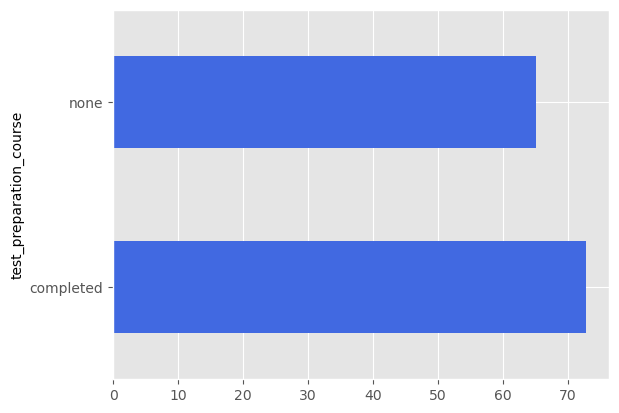

In [54]:
df1 = df[['test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'overall_score']]
df2 = df1.groupby('test_preparation_course').mean()
df2['overall_score'].plot(kind = 'barh', color = 'royalblue')

<p> We can see from this plot that studens who took the test preparation course performed better on exams (in term of the overall score) </p>

<Axes: ylabel='lunch'>

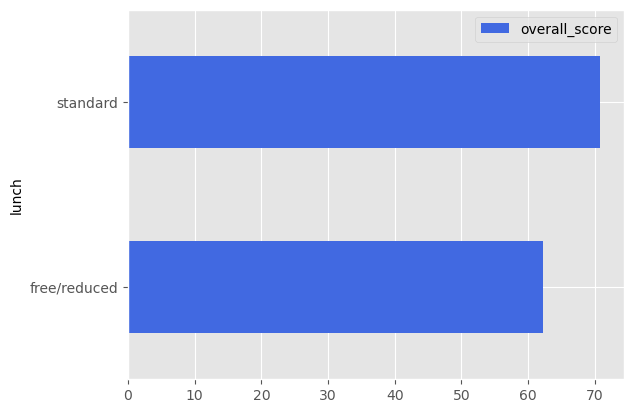

In [56]:
df3 = df[['overall_score', 'lunch' ]]
df4 = df3.groupby('lunch').mean()
df4.plot(kind = 'barh', color = 'royalblue')

<p>We can see from this plot that studens who had a standard lunch performed better on exams (in term of the overall score)</p>

<h1> PERCENTILE ANALYSIS </h1>

<Axes: ylabel='test_preparation_course,grade'>

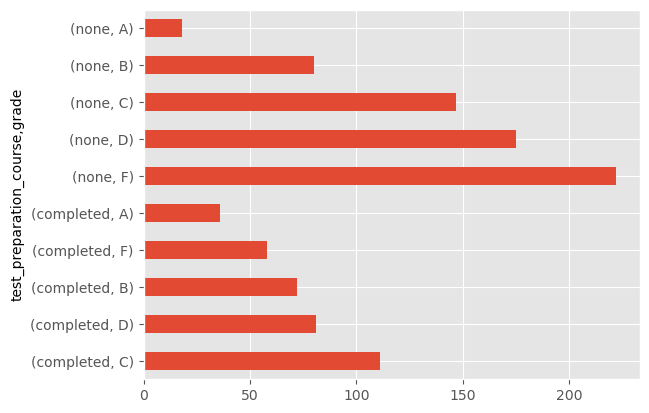

In [66]:
df5 = df[['test_preparation_course', 'grade']]
df6 = df5.groupby('test_preparation_course').value_counts()
df6.plot(kind = 'barh')

<Axes: ylabel='lunch,grade'>

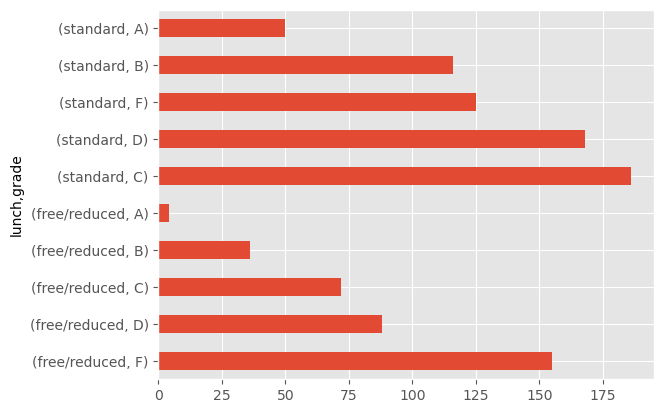

In [69]:
df7 = df[['lunch', 'grade']]
df8 = df7.groupby('lunch').value_counts()
df8.plot(kind = 'barh')

<p> Percentile analysis shows a consistent
pattern for both Exam Grades Percentile
charts on Revision Course and School
Lunch.</p>
<p>Students who achieve better grades are
more likely to have participated in the
Revision Course and had school lunch.</p>
<p>Top-scoring students have a higher
participation rate in these programs than
lower-scoring students.</p>

<h1> Conclusion </h1>

<p>Out of 1000 high school students, only 5% achieved Grade A, while 28% failed their exams.</p>
<p>Male students outperformed female students in Maths, while female students performed better in Readings and Writings.</p>
<p>The commitment to participating in the Revision Course and having School Lunch could be possible factors that affect students' grades</p>